In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitude and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-88.90892319776381 8.409562573250156
47.26617486377393 88.96164515995684
68.73664230027919 -136.63689647139608
51.439068132180324 140.34368574300288
-49.113075612933784 -50.42514389634178
55.407937933385824 -128.52056512770253
61.340428893771445 -178.65941219353974
-50.161639457768395 -97.8752538561688
-66.64080683320248 12.545735673244621
84.93365553930008 -30.776815020487675
11.28992731988913 -63.676228333246954
-65.4828999043903 85.56866932173659
35.41187156138416 -3.022741204387472
-32.076262981716546 110.09412870135702
-37.732911488379145 157.54380199789324
26.866719759248227 58.280665849931665
-79.20099559962748 -90.06860870836172
51.32121009414661 -146.9253840199577
-14.15620477080509 -69.84388686448438
70.25829784615195 53.74829319883412
79.07101167870937 -39.450264097781286
22.069384078436087 -100.62108508644192
-84.65519076615603 -62.125715545081064
-55.41877517438886 122.38965554020393
37.06145795673247 103.10398465378574
49.45090129331189 -155.58382266094313
48.283972736735

61.98621232170976 168.34866381006515
73.37509879713124 13.14018662532871
-7.3269220787656195 -111.72686658002905
-88.57916949597472 53.216858440255834
-33.557459561770656 87.36232448041244
28.312034748595607 -171.43763262545667
25.936296551393752 95.46559423784066
-63.80546352761866 152.0041831988134
-83.40336415078043 -107.40324203912824
75.00096905628806 -101.89083815222014
-46.15159815847174 -19.94891692309315
-78.77506301326645 -163.81122058271194
32.98323949216015 -163.13184083931515
65.76668335780448 69.64767712928588
29.075119661763523 -0.45239085504232435
-47.44917097120097 44.271025517719124
49.00713873293884 -148.41913976252738
40.375525898045225 152.46606118250742
44.00086577299223 -93.65486670442814
48.96505964360068 -83.73437020172207
-78.72830138966133 -113.40635259003703
-85.80971904702882 53.62364318017069
58.24899023376847 -58.606384188046576
-23.313490647578575 -10.237794094102298
-86.7991601298167 107.77392405361945
82.53929887553159 -110.94996341689674
-3.9784093999

In [5]:
from citipy import citipy
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combinations
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities lsit
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

611

In [6]:
# Import the requests library
import requests

#Import the API key
from config import weather_api_key

# Starting URL  for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key



http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1358d88a5cf15b27a93eb9d270b17c95


In [7]:
# Import the time Library and the datetime module from the datetie library
import time
from datetime import datetime

In [8]:

# Create an empty list to hold the weather data
city_data=[]

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("--------------------------")

# Create counters
record_count=1
set_count=1

# loop through all the cities in the list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url= url + "&q="+ city
    #.replace("","+")
    
    # Log the URL, record, and set numers and the city
    print(f"Processing Record{record_count}of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
--------------------------
Processing Record1of Set1 | hermanus
Processing Record2of Set1 | altay
Processing Record3of Set1 | aklavik
Processing Record4of Set1 | de-kastri
Processing Record5of Set1 | mar del plata
Processing Record6of Set1 | terrace
Processing Record7of Set1 | egvekinot
Processing Record8of Set1 | castro
Processing Record9of Set1 | illoqqortoormiut
City not found. Skipping...
Processing Record10of Set1 | la asuncion
Processing Record11of Set1 | busselton
Processing Record12of Set1 | melilla
Processing Record13of Set1 | kiama
Processing Record14of Set1 | minab
Processing Record15of Set1 | punta arenas
Processing Record16of Set1 | kodiak
Processing Record17of Set1 | macusani
Processing Record18of Set1 | belushya guba
City not found. Skipping...
Processing Record19of Set1 | tasiilaq
Processing Record20of Set1 | zaragoza
Processing Record21of Set1 | ushuaia
Processing Record22of Set1 | albany
Processing Record23of Set1 | wuwei
Processing Record24of

Processing Record50of Set4 | komsomolskiy
Processing Record1of Set5 | ewa beach
Processing Record2of Set5 | iqaluit
Processing Record3of Set5 | mae hong son
Processing Record4of Set5 | jumla
Processing Record5of Set5 | east london
Processing Record6of Set5 | sao gabriel da cachoeira
Processing Record7of Set5 | paucartambo
City not found. Skipping...
Processing Record8of Set5 | sioux lookout
Processing Record9of Set5 | zhezkazgan
Processing Record10of Set5 | kazalinsk
City not found. Skipping...
Processing Record11of Set5 | chokurdakh
Processing Record12of Set5 | alekseyevka
Processing Record13of Set5 | esmeraldas
Processing Record14of Set5 | channel-port aux basques
Processing Record15of Set5 | tarko-sale
Processing Record16of Set5 | looc
Processing Record17of Set5 | butaritari
Processing Record18of Set5 | valparaiso
Processing Record19of Set5 | nome
Processing Record20of Set5 | necochea
Processing Record21of Set5 | jiangyou
Processing Record22of Set5 | ketchikan
Processing Record23of 

Processing Record3of Set9 | tornio
Processing Record4of Set9 | deer lake
Processing Record5of Set9 | stekolnyy
City not found. Skipping...
Processing Record6of Set9 | pundaguitan
Processing Record7of Set9 | ambovombe
Processing Record8of Set9 | dancheng
Processing Record9of Set9 | clifton
Processing Record10of Set9 | muriwai beach
Processing Record11of Set9 | fortuna
Processing Record12of Set9 | salalah
Processing Record13of Set9 | ahipara
Processing Record14of Set9 | manali
Processing Record15of Set9 | wajima
Processing Record16of Set9 | quang ngai
Processing Record17of Set9 | aswan
Processing Record18of Set9 | lorengau
Processing Record19of Set9 | izumo
Processing Record20of Set9 | ayan
Processing Record21of Set9 | chifeng
Processing Record22of Set9 | korla
Processing Record23of Set9 | kamina
Processing Record24of Set9 | hirara
Processing Record25of Set9 | boa vista
Processing Record26of Set9 | namibe
Processing Record27of Set9 | arman
Processing Record28of Set9 | kindu
Processing Re

Processing Record5of Set13 | birjand
Processing Record6of Set13 | ola
Processing Record7of Set13 | colac
Processing Record8of Set13 | ossora
Processing Record9of Set13 | george town
Processing Record10of Set13 | mandalgovi
Processing Record11of Set13 | parkes
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
len(city_data)

559

In [10]:
# Conver the array of dictionaries to a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,61.81,88,100,17.31,ZA,2022-10-15 22:48:24
1,Altay,47.8667,88.1167,46.17,30,96,6.62,CN,2022-10-15 22:48:24
2,Aklavik,68.2191,-135.0107,24.80,74,75,10.36,CA,2022-10-15 22:48:25
3,De-Kastri,51.4667,140.7833,49.96,95,90,11.68,RU,2022-10-15 22:48:25
4,Mar Del Plata,-38.0023,-57.5575,55.94,85,0,20.00,AR,2022-10-15 22:48:25


In [11]:
city_data_df2=city_data_df.loc[:,["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
#city_data_df2=pd.DataFrame(city_data_df.loc[:,["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]])
city_data_df2.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-10-15 22:48:24,-34.4187,19.2345,61.81,88,100,17.31
1,Altay,CN,2022-10-15 22:48:24,47.8667,88.1167,46.17,30,96,6.62
2,Aklavik,CA,2022-10-15 22:48:25,68.2191,-135.0107,24.80,74,75,10.36
3,De-Kastri,RU,2022-10-15 22:48:25,51.4667,140.7833,49.96,95,90,11.68
4,Mar Del Plata,AR,2022-10-15 22:48:25,-38.0023,-57.5575,55.94,85,0,20.00


In [12]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df2.to_csv(output_data_file, index_label="City_ID")
# Fixing so that output for city_data_df2 includes "City_ID"
city_data_df2=pd.read_csv(output_data_file)

In [13]:
# Output for adding city data after converting 
city_data_df2

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,2022-10-15 22:48:24,-34.4187,19.2345,61.81,88,100,17.31
1,1,Altay,CN,2022-10-15 22:48:24,47.8667,88.1167,46.17,30,96,6.62
2,2,Aklavik,CA,2022-10-15 22:48:25,68.2191,-135.0107,24.80,74,75,10.36
3,3,De-Kastri,RU,2022-10-15 22:48:25,51.4667,140.7833,49.96,95,90,11.68
4,4,Mar Del Plata,AR,2022-10-15 22:48:25,-38.0023,-57.5575,55.94,85,0,20.00
...,...,...,...,...,...,...,...,...,...,...
554,554,Colac,AU,2022-10-15 23:03:54,-38.3333,143.5833,54.18,72,38,5.73
555,555,Ossora,RU,2022-10-15 23:03:54,59.2353,163.0719,36.14,67,95,4.88
556,556,George Town,MY,2022-10-15 23:00:46,5.4112,100.3354,76.95,96,40,0.00
557,557,Mandalgovi,MN,2022-10-15 23:03:55,45.7625,106.2708,23.65,57,29,5.88


In [14]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df2["Lat"]
max_temps=city_data_df2["Max Temp"]
humidity=city_data_df2["Humidity"]
cloudiness=city_data_df2["Cloudiness"]
wind_speed=city_data_df2["Wind Speed"]

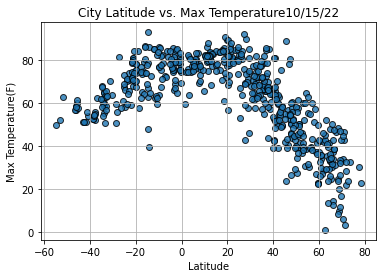

In [15]:
# Import time module
import time

# Build the scatter plot for latitudde vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

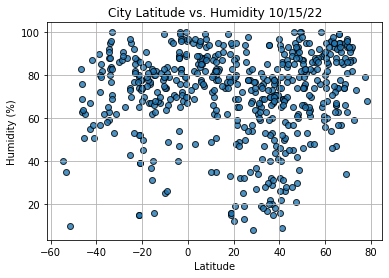

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

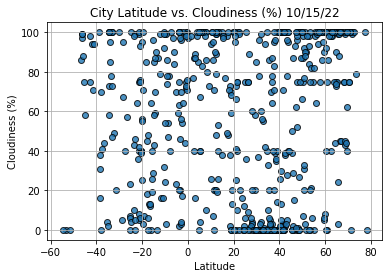

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

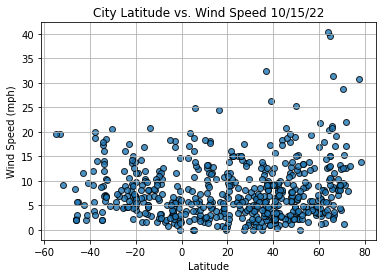

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfomr linear regression on te weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err)= linregress(x_values, y_values)
    
    # Calculate the regressionline "y values" from the slope and intercept
    regress_values=x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Annotate te text for the line equation
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13=city_data_df2.loc[13]
index13


City_ID                        13
City                 Punta Arenas
Country                        CL
Date          2022-10-15 22:48:29
Lat                        -53.15
Lng                      -70.9167
Max Temp                    51.91
Humidity                       35
Cloudiness                      0
Wind Speed                  19.57
Name: 13, dtype: object

In [21]:
city_data_df2

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,2022-10-15 22:48:24,-34.4187,19.2345,61.81,88,100,17.31
1,1,Altay,CN,2022-10-15 22:48:24,47.8667,88.1167,46.17,30,96,6.62
2,2,Aklavik,CA,2022-10-15 22:48:25,68.2191,-135.0107,24.80,74,75,10.36
3,3,De-Kastri,RU,2022-10-15 22:48:25,51.4667,140.7833,49.96,95,90,11.68
4,4,Mar Del Plata,AR,2022-10-15 22:48:25,-38.0023,-57.5575,55.94,85,0,20.00
...,...,...,...,...,...,...,...,...,...,...
554,554,Colac,AU,2022-10-15 23:03:54,-38.3333,143.5833,54.18,72,38,5.73
555,555,Ossora,RU,2022-10-15 23:03:54,59.2353,163.0719,36.14,67,95,4.88
556,556,George Town,MY,2022-10-15 23:00:46,5.4112,100.3354,76.95,96,40,0.00
557,557,Mandalgovi,MN,2022-10-15 23:03:55,45.7625,106.2708,23.65,57,29,5.88


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

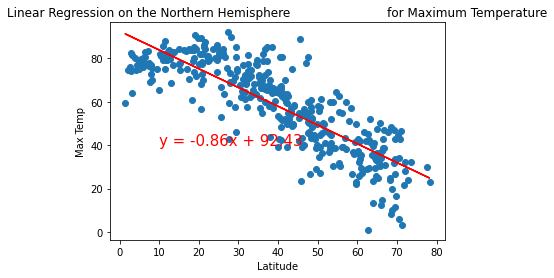

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

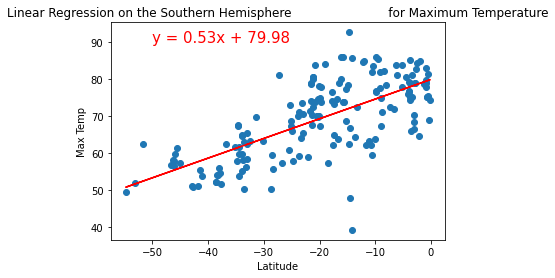

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

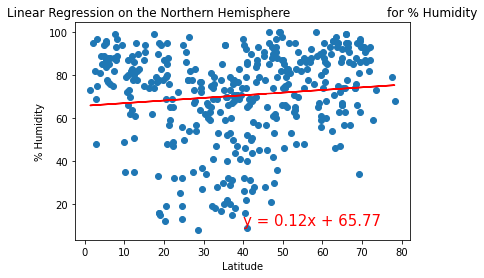

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

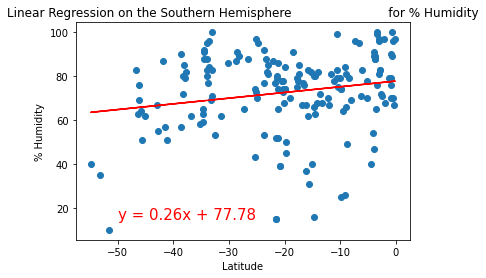

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

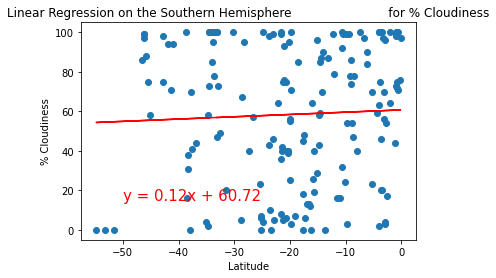

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

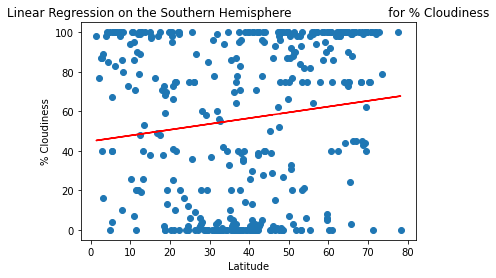

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

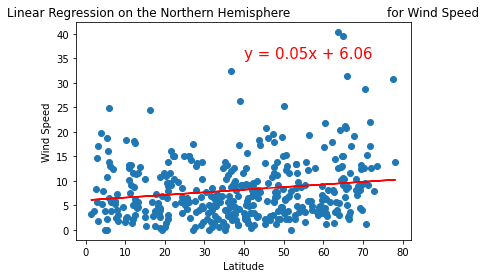

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

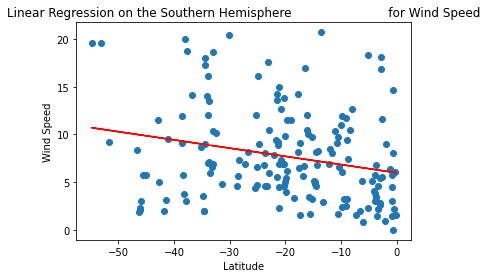

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))